In [1]:
import pandas as pd

destination = pd.read_csv('/Users/wooseobsim/Desktop/농산물/관측지점.csv')

destination = destination.drop(0)
destination.columns = list(destination.loc[1])



In [90]:
import numpy as np

In [177]:
def get_quater(raw_data, year, quat):
    
    if(quat == 1):
        month = [year+'01',year+'02',year+'03']    
    elif(quat == 2):
        month = [year+'04',year+'05',year+'06']
    elif(quat == 3):
        month = [year+'07',year+'08',year+'09']
    elif(quat == 4):
        month = [year+'10',year+'11', year+'12']
    
    
    months = '|'.join(month)
    df = raw_data[raw_data['관측시각'].str.contains(months)]
    
    try:
        df = df.drop(['관측지점코드','관측시각'], axis = 1)
    except:
        pass
    df = df.astype(float)
    df = df.fillna(method='ffill', limit=10)
    df = df.fillna(method='bfill', limit=10)
    df = df.fillna(df.mean())
    y_quat = year+'_'+str(quat)
    result = dict(df.mean())
    result['year_quat'] = y_quat
    return result

In [632]:
def modify(raw, new):
    
    df3 = raw.replace("", np.NaN)
    df4 = df3.dropna(thresh=len(df3)*0.6,axis = 1)
    
    quat_info = pd.DataFrame(columns = df4.columns)
    quat_info = quat_info.drop(['관측지점코드','관측시각'], axis = 1)
    quat_info['year_quat']=""
    
    years = np.arange(2011,2021,1)
    years = list(years)
    years = list(map(str, years))

    for year in years:
        for quat in range(1,5):
            a = get_quater(df4, year, quat)
            quat_info= quat_info.append(a, ignore_index = True)
            
    
    merged_data = []
    for year in years:
        
        d = quat_info[quat_info['year_quat'] == year+'_1']
        a = quat_info[quat_info['year_quat'] == year+'_2']
        b = quat_info[quat_info['year_quat'] == year+'_3']
        c = quat_info[quat_info['year_quat'] == year+'_4']
        
        d = d.drop(['year_quat'], axis = 1)
        a = a.drop(['year_quat'], axis = 1)
        b = b.drop(['year_quat'], axis = 1)
        c = c.drop(['year_quat'], axis = 1)
        
        idx = []
        for col in d.columns:
            col += '_1'
            idx.append(col)
        d.columns = idx        


        idx = []
        for col in a.columns:
            col += '_2'
            idx.append(col)
        a.columns = idx
        
        idx = []
        for col in b.columns:
            col += '_3'
            idx.append(col)
        b.columns = idx    
        
        idx = []
        for col in c.columns:
            col += '_4'
            idx.append(col)
        c.columns = idx
        

        d.reset_index(drop=True, inplace=True)
        a.reset_index(drop=True, inplace=True)
        b.reset_index(drop=True, inplace=True)
        c.reset_index(drop=True, inplace=True)
        
        e = pd.concat([d,a,b,c], axis = 1)
        
        merged_data.append(list(e.loc[0]))
        
        merged = pd.DataFrame(columns = e.columns)
        
        for data in merged_data:
            merged.loc[len(merged)] = data

    return merged

In [39]:
#data_2010 = pd.read_csv('/Users/wooseobsim/Desktop/농산물/농업기상/농업기상_일단위_2010.csv', encoding = 'cp949')
data_2011 = pd.read_csv('/Users/wooseobsim/Desktop/농산물/농업기상/농업기상_일단위_2011.csv', encoding = 'cp949')

In [19]:
data_2010

,관측시각,관측지점코드,기온150CM,기온50CM,기온400CM,풍향300CM,풍향150CM,풍향1000CM,풍속300CM,풍속150CM,...,초상온도,지중온도10CM,지중온도5CM,지중온도20CM,증발량,수중온도,지중열전도량10CM,토양수분10CM보정값,토양수분20CM보정값,토양수분30CM보정값
0,20101013,200821A001,5.0,NaN,NaN,6.0,NaN,NaN,7.0,NaN,...,27.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20101019,200821A001,15.0,NaN,NaN,282.0,NaN,NaN,NaN,NaN,...,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20101020,200821A001,13.0,NaN,NaN,278.0,NaN,NaN,NaN,NaN,...,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20101021,200821A001,9.0,NaN,NaN,270.0,NaN,NaN,NaN,NaN,...,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20101022,200821A001,12.0,NaN,NaN,277.0,NaN,NaN,NaN,NaN,...,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11992,20101227,791945A001,0.0,NaN,NaN,83.0,NaN,NaN,2.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11993,20101228,791945A001,2.0,NaN,NaN,98.0,NaN,NaN,2.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11994,20101229,791945A001,-1.0,NaN,NaN,113.0,NaN,NaN,3.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11995,20101230,791945A001,0.0,NaN,NaN,94.0,NaN,NaN,3.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
kyung_2011

,관측시각,관측지점코드,기온150CM,기온50CM,기온400CM,풍향300CM,풍향150CM,풍향1000CM,풍속300CM,풍속150CM,...,초상온도,지중온도10CM,지중온도5CM,지중온도20CM,증발량,수중온도,지중열전도량10CM,토양수분10CM보정값,토양수분20CM보정값,토양수분30CM보정값
13694,20110417,445891A001,12.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,11.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13695,20110418,445891A001,8.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,8.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13696,20110419,445891A001,11.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,11.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13697,20110420,445891A001,12.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,11.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13698,20110421,445891A001,14.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,13.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13948,20111227,445891A001,-5.0,NaN,NaN,183.0,183.0,183.0,NaN,NaN,...,-6.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
13949,20111228,445891A001,-1.0,NaN,NaN,156.0,156.0,156.0,NaN,NaN,...,-2.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
13950,20111229,445891A001,0.0,NaN,NaN,246.0,246.0,246.0,NaN,NaN,...,-1.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
13951,20111230,445891A001,-3.0,NaN,NaN,216.0,216.0,216.0,NaN,NaN,...,-4.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
data = pd.read_csv('/Users/wooseobsim/Desktop/농산물/농업기상/농업기상_일단위_2020.csv', encoding = 'cp949')

whole = pd.concat([whole, data])

In [146]:
whole

,관측시각,관측지점코드,기온150CM,기온50CM,기온400CM,풍향300CM,풍향150CM,풍향1000CM,풍속300CM,풍속150CM,...,증발량,수중온도,지중열전도량10CM,토양수분10CM보정값,토양수분20CM보정값,토양수분30CM보정값,Unnamed: 31,토양수분보정값10CM,토양수분보정값20CM,토양수분보정값30CM
0,20110101,200821A001,-4.00,NaN,NaN,279.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20110102,200821A001,-4.00,NaN,NaN,307.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20110103,200821A001,-3.00,NaN,NaN,289.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20110104,200821A001,-3.00,NaN,NaN,296.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20110105,200821A001,-3.00,NaN,NaN,311.00,NaN,NaN,2.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78332,20201231,767862A001,-4.07,NaN,NaN,184.75,NaN,195.96,3.20,3.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.39,NaN,NaN
78333,20201231,769912A001,-8.04,NaN,NaN,251.23,NaN,NaN,1.22,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00,NaN,NaN
78334,20201231,770270A001,-5.98,NaN,NaN,299.53,NaN,309.35,2.76,2.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.06,NaN,NaN
78335,20201231,780950A001,-5.40,NaN,NaN,340.84,0.0,153.98,1.78,1.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.92,NaN,NaN


In [147]:
whole_data = whole.reset_index()

In [148]:
whole_data = whole_data.drop(['index'],axis = 1)

In [153]:
#whole['관측시각'] = pd.to_numeric(whole['관측시각'])
whole_data['관측시각'] = whole_data['관측시각'].astype(str)

In [627]:
regions = ['경기도', '강원도', '충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주도','서울','부산','인천','울산',
         '세종시']
a = 0

#for region in regions:
location = destination.도명 == '경기도'
codes = list(destination[location]['지점코드'])
#print(region)
for code in codes:
    kyung_idx = whole.관측지점코드 == code
    kyung = whole[kyung_idx]
        

In [1196]:
kyung.columns

Index(['관측시각', '관측지점코드', '기온150CM', '기온50CM', '기온400CM', '풍향300CM', '풍향150CM',
       '풍향1000CM', '풍속300CM', '풍속150CM', '풍속1000CM', '습도150CM', '습도50CM',
       '습도400CM', '강수량', '토양수분10CM', '토양수분20CM', '토양수분30CM', '결로시간', '일사량',
       '일조시간', '초상온도', '지중온도10CM', '지중온도5CM', '지중온도20CM', '증발량', '수중온도',
       '지중열전도량10CM', '토양수분10CM보정값', '토양수분20CM보정값', '토양수분30CM보정값',
       'Unnamed: 31', '토양수분보정값10CM', '토양수분보정값20CM', '토양수분보정값30CM'],
      dtype='object')

In [154]:
whole_data

,관측시각,관측지점코드,기온150CM,기온50CM,기온400CM,풍향300CM,풍향150CM,풍향1000CM,풍속300CM,풍속150CM,...,증발량,수중온도,지중열전도량10CM,토양수분10CM보정값,토양수분20CM보정값,토양수분30CM보정값,Unnamed: 31,토양수분보정값10CM,토양수분보정값20CM,토양수분보정값30CM
0,20110101,200821A001,-4.00,NaN,NaN,279.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20110102,200821A001,-4.00,NaN,NaN,307.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20110103,200821A001,-3.00,NaN,NaN,289.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20110104,200821A001,-3.00,NaN,NaN,296.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20110105,200821A001,-3.00,NaN,NaN,311.00,NaN,NaN,2.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597717,20201231,767862A001,-4.07,NaN,NaN,184.75,NaN,195.96,3.20,3.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.39,NaN,NaN
597718,20201231,769912A001,-8.04,NaN,NaN,251.23,NaN,NaN,1.22,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00,NaN,NaN
597719,20201231,770270A001,-5.98,NaN,NaN,299.53,NaN,309.35,2.76,2.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.06,NaN,NaN
597720,20201231,780950A001,-5.40,NaN,NaN,340.84,0.0,153.98,1.78,1.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.92,NaN,NaN


In [633]:
location = destination.도명 == '경기도'
codes = list(destination[location]['지점코드'])
#print(region)
for code in codes:
    kyung_idx = whole_data.관측지점코드 == code
    kyung = whole_data[kyung_idx]

In [634]:
kyung_year = modify(kyung, whole)

In [635]:
kyung_year

,기온150CM_1,풍향300CM_1,풍향150CM_1,풍향1000CM_1,습도150CM_1,습도50CM_1,습도400CM_1,강수량_1,토양수분10CM_1,토양수분30CM_1,...,습도50CM_4,습도400CM_4,강수량_4,토양수분10CM_4,토양수분30CM_4,결로시간_4,일사량_4,일조시간_4,초상온도_4,지중온도10CM_4
0,9.940000,251.336667,0.000000,174.750000,62.443333,62.443333,62.443333,2.666667,29.100000,1.070000,...,56.413333,56.413333,0.925532,34.625957,14.285833,257.638298,8.583298,317.159574,7.890000,9.821170
1,1.111170,219.490319,109.781250,215.121064,61.909468,50.468462,50.468462,0.638298,34.103936,24.919231,...,69.823077,69.823077,2.252632,38.962316,23.876154,314.863158,8.953789,340.452632,4.963895,8.586316
2,0.800000,217.688889,NaN,217.688889,67.888889,NaN,NaN,1.422222,38.766667,NaN,...,NaN,NaN,1.010870,34.347826,38.168539,401.608696,2.054348,336.032609,15.708333,11.402174
3,3.255556,243.100000,217.411111,124.833333,67.400000,NaN,NaN,0.455556,35.088889,39.644444,...,71.163043,71.163043,1.532609,34.826087,38.423913,245.228261,10.500000,338.456522,6.576087,8.119565
4,2.311111,265.188889,0.000000,177.144444,65.711111,65.711111,65.711111,0.611111,35.288889,39.944444,...,77.195652,77.195652,2.543478,34.586957,38.217391,475.108696,8.923913,286.108696,8.608696,6.673913
5,1.692308,255.824176,0.000000,204.527473,65.549451,65.549451,65.549451,1.219780,34.329670,40.846154,...,67.978261,67.978261,1.576087,34.456522,38.315217,332.173913,7.391304,282.032609,7.934783,8.913043
6,1.233333,261.788889,0.000000,186.611111,62.688889,62.688889,62.688889,0.433333,34.833333,40.100000,...,65.195652,65.195652,0.956522,29.782609,35.021739,239.478261,2.793478,347.195652,6.293478,10.434783
7,0.200000,254.044444,0.000000,196.422222,61.688889,61.688889,61.688889,1.166667,29.677778,37.700000,...,60.967391,60.967391,2.597826,36.967391,39.695652,266.467391,25.423913,355.293478,6.217391,10.554348
8,1.933667,258.018444,0.000000,199.744000,52.627444,52.627444,52.627444,0.750000,31.361444,39.871556,...,66.669457,66.669457,2.173913,37.550978,40.934783,263.804348,4.803696,342.032609,8.040000,11.538696
9,3.736703,224.291209,0.000000,180.587363,62.055604,62.055604,62.055604,1.521978,38.062308,41.434835,...,63.314835,63.314835,0.681319,20.428132,23.336264,153.813187,5.947143,434.461538,7.452857,9.286374


In [636]:
production = pd.read_csv('/Users/wooseobsim/Desktop/농산물/파_생산량.csv', encoding = 'cp949')

In [637]:
i = 10

In [638]:
c = (production[production.시도별 == '경기도'])
e = list(c.loc[i])[1:]
e = list(map(int,e))
i += 1

In [639]:
kyung_year['prod'] = e

In [640]:
kyung_year

,기온150CM_1,풍향300CM_1,풍향150CM_1,풍향1000CM_1,습도150CM_1,습도50CM_1,습도400CM_1,강수량_1,토양수분10CM_1,토양수분30CM_1,...,습도400CM_4,강수량_4,토양수분10CM_4,토양수분30CM_4,결로시간_4,일사량_4,일조시간_4,초상온도_4,지중온도10CM_4,prod
0,9.940000,251.336667,0.000000,174.750000,62.443333,62.443333,62.443333,2.666667,29.100000,1.070000,...,56.413333,0.925532,34.625957,14.285833,257.638298,8.583298,317.159574,7.890000,9.821170,2714
1,1.111170,219.490319,109.781250,215.121064,61.909468,50.468462,50.468462,0.638298,34.103936,24.919231,...,69.823077,2.252632,38.962316,23.876154,314.863158,8.953789,340.452632,4.963895,8.586316,2691
2,0.800000,217.688889,NaN,217.688889,67.888889,NaN,NaN,1.422222,38.766667,NaN,...,NaN,1.010870,34.347826,38.168539,401.608696,2.054348,336.032609,15.708333,11.402174,2660
3,3.255556,243.100000,217.411111,124.833333,67.400000,NaN,NaN,0.455556,35.088889,39.644444,...,71.163043,1.532609,34.826087,38.423913,245.228261,10.500000,338.456522,6.576087,8.119565,2669
4,2.311111,265.188889,0.000000,177.144444,65.711111,65.711111,65.711111,0.611111,35.288889,39.944444,...,77.195652,2.543478,34.586957,38.217391,475.108696,8.923913,286.108696,8.608696,6.673913,2712
5,1.692308,255.824176,0.000000,204.527473,65.549451,65.549451,65.549451,1.219780,34.329670,40.846154,...,67.978261,1.576087,34.456522,38.315217,332.173913,7.391304,282.032609,7.934783,8.913043,2557
6,1.233333,261.788889,0.000000,186.611111,62.688889,62.688889,62.688889,0.433333,34.833333,40.100000,...,65.195652,0.956522,29.782609,35.021739,239.478261,2.793478,347.195652,6.293478,10.434783,2309
7,0.200000,254.044444,0.000000,196.422222,61.688889,61.688889,61.688889,1.166667,29.677778,37.700000,...,60.967391,2.597826,36.967391,39.695652,266.467391,25.423913,355.293478,6.217391,10.554348,2312
8,1.933667,258.018444,0.000000,199.744000,52.627444,52.627444,52.627444,0.750000,31.361444,39.871556,...,66.669457,2.173913,37.550978,40.934783,263.804348,4.803696,342.032609,8.040000,11.538696,2317
9,3.736703,224.291209,0.000000,180.587363,62.055604,62.055604,62.055604,1.521978,38.062308,41.434835,...,63.314835,0.681319,20.428132,23.336264,153.813187,5.947143,434.461538,7.452857,9.286374,2295


In [641]:
kyung_year.corr()['prod'].sort_values(ascending = False)

prod          1.000000
습도150CM_4     0.831579
기온150CM_2     0.817510
습도150CM_3     0.714864
습도150CM_2     0.678553
                ...   
토양수분30CM_3   -0.642318
일조시간_2       -0.660636
일조시간_1       -0.688651
지중온도10CM_2   -0.850862
지중온도10CM_3   -0.872492
Name: prod, Length: 61, dtype: float64

In [642]:
location = destination.도명 == '강원도'
codes = list(destination[location]['지점코드'])
#print(region)
for code in codes:
    kang_idx = whole_data.관측지점코드 == code
    kang = whole_data[kang_idx]
    
    
c = (production[production.시도별 == '강원도'])
e = list(c.loc[i])[1:]
e = list(map(int,e))
i += 1
kang_year = modify(kang, whole_data)
kang_year['prod'] = e

In [643]:
kang_year.corr()['prod'].sort_values(ascending = False)

prod          1.000000
풍향1000CM_1    0.503178
습도400CM_2     0.445817
습도50CM_2      0.445817
일사량_4         0.386369
풍향1000CM_2    0.373452
습도400CM_3     0.356542
습도50CM_3      0.356542
토양수분10CM_3    0.243266
토양수분10CM_1    0.220796
습도150CM_3     0.204148
일사량_3         0.151651
지중온도10CM_4    0.143437
결로시간_3        0.137925
습도150CM_1     0.127247
습도400CM_4     0.121314
습도50CM_4      0.121314
토양수분10CM_2    0.110514
기온150CM_1     0.071916
풍향150CM_1     0.046305
일사량_1         0.045765
강수량_3         0.041273
초상온도_1        0.032769
결로시간_2        0.000010
풍향1000CM_4   -0.007242
일사량_2        -0.021302
토양수분10CM_4   -0.021928
결로시간_1       -0.038908
강수량_1        -0.054917
일조시간_4       -0.097303
습도150CM_4    -0.105555
지중온도10CM_1   -0.112241
습도150CM_2    -0.127458
기온150CM_2    -0.161097
풍향300CM_3    -0.191829
풍향150CM_2    -0.201313
지중온도10CM_3   -0.218747
습도400CM_1    -0.234571
습도50CM_1     -0.234571
풍향300CM_4    -0.246938
지중온도10CM_2   -0.259229
풍향150CM_4    -0.277618
풍향150CM_3    -0.277717
초상온도_4     

In [644]:
location = destination.도명 == '충청북도'
codes = list(destination[location]['지점코드'])
#print(region)
for code in codes:
    nor_chung_idx = whole_data.관측지점코드 == code
    nor_chung = whole_data[nor_chung_idx]
    
    
c = (production[production.시도별 == '충청북도'])
e = list(c.loc[i])[1:]
e = list(map(int,e))
i += 1
nor_chung_year = modify(nor_chung, whole_data)
nor_chung_year['prod'] = e

nor_chung_year.corr()['prod'].sort_values(ascending = False)


prod          1.000000
풍향300CM_2     0.440632
풍향300CM_1     0.336381
토양수분10CM_2    0.285636
일사량_1         0.258570
토양수분10CM_4    0.251814
결로시간_4        0.141419
강수량_2         0.140425
강수량_4         0.133273
결로시간_1        0.128460
습도150CM_1     0.107266
일사량_2         0.049725
토양수분10CM_3    0.044722
습도150CM_2     0.018417
풍향300CM_4     0.006827
토양수분10CM_1    0.003184
지중온도10CM_1   -0.064448
습도150CM_4    -0.066951
강수량_1        -0.096234
일조시간_4       -0.188486
기온150CM_4    -0.235313
풍향300CM_3    -0.235892
지중온도10CM_2   -0.239962
강수량_3        -0.258901
일사량_4        -0.314281
지중온도10CM_3   -0.329912
결로시간_3       -0.365945
기온150CM_2    -0.378073
일조시간_1       -0.419952
일조시간_3       -0.438060
기온150CM_3    -0.455610
일조시간_2       -0.457426
결로시간_2       -0.473076
일사량_3        -0.491540
지중온도10CM_4   -0.494250
기온150CM_1    -0.517157
습도150CM_3    -0.539462
Name: prod, dtype: float64

In [645]:
location = destination.도명 == '충청남도'
codes = list(destination[location]['지점코드'])
#print(region)
for code in codes:
    s_chung_idx = whole_data.관측지점코드 == code
    s_chung = whole_data[s_chung_idx]
    
    
c = (production[production.시도별 == '충청남도'])
e = list(c.loc[i])[1:]
e = list(map(int,e))
i += 1
s_chung_year = modify(s_chung, whole_data)
s_chung_year['prod'] = e

s_chung_year.corr()['prod'].sort_values(ascending = False)

prod          1.000000
일조시간_3        0.500248
풍향300CM_3     0.479850
결로시간_1        0.462622
풍향300CM_4     0.448323
결로시간_2        0.442353
강수량_4         0.437641
습도150CM_4     0.421575
일조시간_4        0.419594
기온150CM_2     0.412211
초상온도_3        0.409268
기온150CM_3     0.391422
풍속300CM_4     0.343008
초상온도_4        0.341922
풍속300CM_1     0.282885
토양수분10CM_2    0.269084
일조시간_1        0.251038
토양수분10CM_1    0.231223
초상온도_2        0.216332
풍속300CM_2     0.206592
일사량_4         0.197296
일조시간_2        0.158770
풍향300CM_1     0.112531
풍향300CM_2     0.079086
일사량_3         0.036736
기온150CM_1     0.006582
강수량_2         0.001253
강수량_1        -0.011076
기온150CM_4    -0.038066
결로시간_4       -0.076939
습도150CM_1    -0.106182
결로시간_3       -0.156161
토양수분10CM_4   -0.184292
초상온도_1       -0.407487
강수량_3        -0.478633
일사량_2        -0.526357
풍속300CM_3    -0.549914
습도150CM_2    -0.578838
일사량_1        -0.663886
토양수분10CM_3   -0.666964
습도150CM_3    -0.869611
Name: prod, dtype: float64

In [646]:
location = destination.도명 == '전라북도'
codes = list(destination[location]['지점코드'])
#print(region)
for code in codes:
    nor_jeon_idx = whole_data.관측지점코드 == code
    nor_jeon = whole_data[nor_jeon_idx]
    
    
c = (production[production.시도별 == '전라북도'])
e = list(c.loc[i])[1:]
e = list(map(int,e))
i += 1
nor_jeon_year = modify(nor_jeon, whole_data)
nor_jeon_year['prod'] = e

nor_jeon_year.corr()['prod'].sort_values(ascending = False)

prod          1.000000
토양수분10CM_4    0.748542
일사량_3         0.715788
토양수분10CM_2    0.708077
일사량_1         0.689629
                ...   
일사량_4        -0.331610
풍속1000CM_3   -0.761197
풍속150CM_3    -0.761197
풍속300CM_3    -0.761406
일조시간_4       -0.805653
Name: prod, Length: 61, dtype: float64

In [647]:

location = destination.도명 == '전라남도'
codes = list(destination[location]['지점코드'])
#print(region)
for code in codes:
    s_jeon_idx = whole_data.관측지점코드 == code
    s_jeon = whole_data[s_jeon_idx]
    
    
c = (production[production.시도별 == '전라남도'])
e = list(c.loc[15])[1:]
e = list(map(int,e))
i += 1
s_jeon_year = modify(s_jeon, whole_data)
s_jeon_year['prod'] = e

s_jeon_year.corr()['prod'].sort_values(ascending = False)

prod          1.000000
습도400CM_3     0.753533
습도50CM_3      0.753533
일사량_1         0.633826
풍향300CM_2     0.628450
결로시간_3        0.628228
초상온도_3        0.614750
지중온도10CM_3    0.602894
초상온도_4        0.599198
풍향300CM_1     0.580909
결로시간_2        0.542504
습도400CM_4     0.508843
습도50CM_4      0.508843
지중온도10CM_4    0.502068
일사량_4         0.408428
결로시간_4        0.346687
습도150CM_3     0.277458
습도50CM_2      0.273481
습도400CM_2     0.273481
풍향300CM_4     0.241612
일사량_3         0.157383
토양수분10CM_4    0.123632
토양수분10CM_3    0.114100
강수량_4         0.070972
일사량_2         0.049258
초상온도_2        0.048045
풍향1000CM_1    0.024488
기온150CM_4     0.015604
습도150CM_4     0.011382
결로시간_1        0.009661
기온150CM_3    -0.026522
초상온도_1       -0.049219
강수량_2        -0.085295
습도50CM_1     -0.108909
습도400CM_1    -0.108909
지중온도10CM_1   -0.161567
강수량_1        -0.179343
지중온도10CM_2   -0.184035
토양수분10CM_1   -0.224905
기온150CM_1    -0.249498
강수량_3        -0.262016
토양수분10CM_2   -0.312872
풍향1000CM_2   -0.426628
풍향150CM_1  

In [648]:
location = destination.도명 == '경상북도'
codes = list(destination[location]['지점코드'])
#print(region)
for code in codes:
    nor_kyung_idx = whole_data.관측지점코드 == code
    nor_kyung = whole_data[nor_kyung_idx]
    
    
c = (production[production.시도별 == '경상북도'])
e = list(c.loc[i])[1:]
e = list(map(int,e))
i += 1
nor_kyung_year = modify(nor_kyung, whole_data)
nor_kyung_year['prod'] = e

nor_kyung_year.corr()['prod'].sort_values(ascending = False)

prod          1.000000
기온150CM_1     0.901649
지중온도10CM_1    0.830765
풍향300CM_1     0.812887
습도150CM_1     0.720026
습도150CM_3     0.641644
풍향300CM_4     0.585331
강수량_3         0.538617
토양수분10CM_1    0.505947
초상온도_4        0.459891
초상온도_2        0.452778
지중온도10CM_2    0.449570
일사량_4         0.421600
초상온도_3        0.409310
지중온도10CM_4    0.353103
습도150CM_2     0.291614
풍향300CM_2     0.270320
풍속300CM_3     0.261670
기온150CM_2     0.252994
기온150CM_4     0.244677
일사량_2         0.230625
결로시간_1        0.228294
습도150CM_4     0.218518
결로시간_2        0.217193
결로시간_3        0.215429
일사량_3         0.179953
강수량_1         0.137118
토양수분10CM_3    0.039039
초상온도_1        0.033719
일사량_1         0.015520
풍속300CM_4    -0.006094
토양수분10CM_2   -0.029124
풍향300CM_3    -0.034475
강수량_2        -0.035772
지중온도10CM_3   -0.233625
토양수분10CM_4   -0.235264
강수량_4        -0.246682
기온150CM_3    -0.300695
결로시간_4       -0.343321
풍속300CM_2    -0.380645
풍속300CM_1    -0.684462
Name: prod, dtype: float64

In [649]:
location = destination.도명 == '경상남도'
codes = list(destination[location]['지점코드'])
#print(region)
for code in codes:
    s_kyung_idx = whole_data.관측지점코드 == code
    s_kyung = whole_data[s_kyung_idx]
    
    
c = (production[production.시도별 == '경상남도'])
e = list(c.loc[i])[1:]
e = list(map(int,e))
i += 1
s_kyung_year = modify(s_kyung, whole_data)
s_kyung_year['prod'] = e

s_kyung_year.corr()['prod'].sort_values(ascending = False)

prod          1.000000
일조시간_4        0.875047
일조시간_3        0.861870
일조시간_1        0.855555
풍향300CM_3     0.797776
풍향300CM_4     0.583344
풍향300CM_1     0.503793
풍향1000CM_3    0.446323
일사량_3         0.405401
습도50CM_1      0.398604
습도400CM_1     0.398604
결로시간_1        0.389328
일사량_4         0.369866
습도150CM_2     0.340558
풍향1000CM_4    0.318970
기온150CM_1     0.280238
일사량_2         0.277172
습도150CM_1     0.268360
일조시간_2        0.197892
결로시간_4        0.173854
풍향1000CM_2    0.125604
풍향1000CM_1    0.037268
지중온도10CM_2    0.034320
습도50CM_2     -0.029338
습도400CM_2    -0.029338
토양수분10CM_4   -0.044611
일사량_1        -0.067017
기온150CM_4    -0.077982
강수량_1        -0.229709
습도150CM_4    -0.279310
강수량_4        -0.333511
결로시간_2       -0.348336
습도400CM_4    -0.349508
습도50CM_4     -0.349508
기온150CM_2    -0.406894
강수량_3        -0.440255
기온150CM_3    -0.448815
지중온도10CM_3   -0.470730
결로시간_3       -0.475684
지중온도10CM_4   -0.538127
풍향300CM_2    -0.565406
토양수분10CM_2   -0.585545
지중온도10CM_1   -0.638712
강수량_2      

In [650]:
location = destination.도명 == '제주도'
codes = list(destination[location]['지점코드'])
#print(region)
for code in codes:
    jeju_idx = whole_data.관측지점코드 == code
    jeju = whole_data[jeju_idx]
    
    
c = (production[production.시도별 == '제주도'])
e = list(c.loc[i])[1:]
e = list(map(int,e))
i += 1
jeju_year = modify(jeju, whole_data)
jeju_year['prod'] = e

jeju_year.corr()['prod'].sort_values(ascending = False)

prod          1.000000
풍속300CM_4     0.676426
풍속300CM_3     0.543200
토양수분10CM_3    0.523420
습도150CM_3     0.498379
일사량_4         0.493657
습도150CM_1     0.468614
일사량_2         0.376146
기온150CM_4     0.343755
일조시간_2        0.323610
풍속300CM_2     0.271720
일조시간_4        0.254690
토양수분10CM_1    0.252053
결로시간_1        0.223193
강수량_3         0.110280
기온150CM_3     0.098326
기온150CM_2     0.082305
초상온도_3        0.051627
초상온도_2        0.046474
습도150CM_4     0.010175
풍향300CM_2     0.007779
기온150CM_1     0.002849
풍향300CM_3    -0.000219
결로시간_3       -0.003178
초상온도_4       -0.015724
강수량_4        -0.027175
풍향1000CM_2   -0.054501
풍향1000CM_3   -0.071237
일조시간_1       -0.082529
풍향300CM_4    -0.101280
토양수분10CM_4   -0.111602
토양수분10CM_2   -0.119992
습도150CM_2    -0.209656
풍향300CM_1    -0.212685
일사량_3        -0.264163
풍향1000CM_1   -0.313178
풍속300CM_1    -0.324768
일사량_1        -0.329068
강수량_1        -0.338575
초상온도_1       -0.339944
결로시간_2       -0.369809
강수량_2        -0.395385
풍향1000CM_4   -0.462800
결로시간_4     

In [651]:
whole_year = pd.concat([kyung_year, kang_year, nor_chung_year, s_chung_year, nor_jeon_year, s_jeon_year, nor_kyung_year, s_kyung_year, jeju_year], ignore_index = True)

In [652]:
whole_year.corr()['prod'].sort_values(ascending = False)

prod          1.000000
풍속150CM_2     0.500929
풍속1000CM_2    0.500929
풍향300CM_4     0.329849
풍향300CM_1     0.320427
                ...   
기온150CM_4    -0.226548
토양수분30CM_3   -0.259057
초상온도_1       -0.314669
풍속150CM_3    -0.761197
풍속1000CM_3   -0.761197
Name: prod, Length: 73, dtype: float64

In [653]:
whole_year = whole_year.replace(0, np.NaN)

In [945]:
whole_year

,기온150CM_1,풍향300CM_1,풍향150CM_1,풍향1000CM_1,습도150CM_1,습도50CM_1,습도400CM_1,강수량_1,토양수분10CM_1,토양수분30CM_1,...,풍속300CM_3,풍속300CM_4,풍속150CM_1,풍속1000CM_1,풍속150CM_2,풍속1000CM_2,풍속150CM_3,풍속1000CM_3,풍속150CM_4,풍속1000CM_4
0,9.940000,251.336667,0.000000,174.750000,62.443333,62.443333,62.443333,2.666667,29.100000,1.070000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.111170,219.490319,109.781250,215.121064,61.909468,50.468462,50.468462,0.638298,34.103936,24.919231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.800000,217.688889,NaN,217.688889,67.888889,NaN,NaN,1.422222,38.766667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.255556,243.100000,217.411111,124.833333,67.400000,NaN,NaN,0.455556,35.088889,39.644444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.311111,265.188889,0.000000,177.144444,65.711111,65.711111,65.711111,0.611111,35.288889,39.944444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,6.560440,176.692308,NaN,177.912088,66.604396,NaN,NaN,2.912088,24.835165,NaN,...,1.472527,1.489130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,6.577778,151.666667,NaN,104.900000,65.322222,NaN,NaN,1.177778,27.211111,NaN,...,1.690909,1.480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,6.288889,160.088889,NaN,38.488889,70.222222,NaN,NaN,2.733333,28.844444,NaN,...,1.913043,1.369565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,6.954222,148.674667,NaN,46.273444,68.101000,NaN,NaN,1.044444,28.988556,NaN,...,1.930814,1.694130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [655]:
whole_year.corr()['prod'].sort_values(ascending = False)

prod          1.000000
풍속150CM_2     0.500929
풍속1000CM_2    0.500929
풍향300CM_4     0.329849
풍향300CM_1     0.320427
                ...   
풍향150CM_3    -0.254570
토양수분30CM_3   -0.259057
초상온도_1       -0.314669
풍속150CM_3    -0.761197
풍속1000CM_3   -0.761197
Name: prod, Length: 73, dtype: float64

In [268]:
yang_production = pd.read_csv('/Users/wooseobsim/Desktop/농산물/양파_생산량.csv', encoding = 'cp949')

In [277]:
yang_production = yang_production.drop(0)

In [279]:
yang_production = yang_production.drop(1)

In [280]:
yang_production

,시도별,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,서울특별시,0,0,0,0,0,0,4559,5502,6540,5942
3,부산광역시,7393,6303,8265,7271,6584,7445,6082,4881,6463,7788
4,대구광역시,5379,3901,6909,6089,4328,7108,8734,9368,8426,8950
5,인천광역시,3804,3709,2294,4072,2833,6046,5569,5632,6477,6595
6,광주광역시,5574,7733,7443,6628,6603,5700,5580,5940,6994,7541
7,대전광역시,6276,3936,4191,6628,5707,6270,5243,5570,5547,6614
8,울산광역시,4950,3970,5889,5646,5167,7445,6082,6451,5984,6008
9,세종특별자치시,-,-,-,-,-,6270,5243,5570,5485,6614
10,경기도,5405,3278,5170,4080,4628,6046,4559,5502,6545,5942
11,강원도,5139,4865,2892,3463,4025,6224,5911,5542,6014,5864


In [281]:
i = 10
c = (yang_production[yang_production.시도별 == '경기도'])
e = list(c.loc[i])[1:]
e = list(map(int,e))
i += 1
kyung_year['prod_yang'] = e

In [288]:
def crop_add(crops,crops_name,kyung_year, kang_year, nor_chung_year, s_chung_year, nor_jeon_year, s_jeon_year, nor_kyung_year, s_kyung_year, jeju_year):
    
    i = 10
    c = (crops[crops.시도별 == '경기도'])
    e = list(c.loc[i])[1:]
    e = list(map(int,e))
    i += 1
    kyung_year[crops_name] = e
    
    c = (crops[crops.시도별 == '강원도'])
    e = list(c.loc[i])[1:]
    e = list(map(int,e))
    i += 1
    kang_year[crops_name] = e

    c = (crops[crops.시도별 == '충청북도'])
    e = list(c.loc[i])[1:]
    e = list(map(int,e))
    i += 1
    nor_chung_year[crops_name] = e

    c = (crops[crops.시도별 == '충청남도'])
    e = list(c.loc[i])[1:]
    e = list(map(int,e))
    i += 1
    s_chung_year[crops_name] = e

    c = (crops[crops.시도별 == '전라북도'])
    e = list(c.loc[i])[1:]
    e = list(map(int,e))
    i += 1
    nor_jeon_year[crops_name] = e    

    c = (crops[crops.시도별 == '전라남도'])
    e = list(c.loc[15])[1:]
    e = list(map(int,e))
    i += 1
    s_jeon_year = modify(s_jeon, whole_data)
    s_jeon_year[crops_name] = e

    c = (crops[crops.시도별 == '경상북도'])
    e = list(c.loc[i])[1:]
    e = list(map(int,e))
    i += 1
    nor_kyung_year[crops_name] = e

    c = (crops[crops.시도별 == '경상남도'])
    e = list(c.loc[i])[1:]
    e = list(map(int,e))
    i += 1
    s_kyung_year[crops_name] = e

    c = (crops[crops.시도별 == '제주도'])
    e = list(c.loc[i])[1:]
    e = list(map(int,e))
    i += 1
    jeju_year[crops_name] = e
    
    #return pd.concat([kyung_year, kang_year, nor_chung_year, s_chung_year, nor_jeon_year, s_jeon_year, nor_kyung_year, s_kyung_year, jeju_year], ignore_index = True)

In [656]:
whole_year = pd.concat([kyung_year, kang_year, nor_chung_year, s_chung_year, nor_jeon_year, s_jeon_year, nor_kyung_year, s_kyung_year, jeju_year], ignore_index = True)

In [1131]:
whole_year.corr()['prod'].sort_values(ascending = False)

prod          1.000000
풍속150CM_2     0.500929
풍속1000CM_2    0.500929
풍향300CM_4     0.329849
풍향300CM_1     0.320427
                ...   
기온150CM_4    -0.226548
토양수분30CM_3   -0.259057
초상온도_1       -0.314669
풍속150CM_3    -0.761197
풍속1000CM_3   -0.761197
Name: prod, Length: 73, dtype: float64

In [749]:
whole_yang = crop_add(yang_production ,'prod_yang',kyung_year, kang_year, nor_chung_year, s_chung_year, nor_jeon_year, s_jeon_year, nor_kyung_year, s_kyung_year, jeju_year)

In [667]:
ma_production = pd.read_csv('/Users/wooseobsim/Desktop/농산물/마늘_생산량.csv', encoding = 'cp949')

In [668]:
ma_production = ma_production.drop(0)

In [669]:
ma_production = ma_production.drop(1)

In [882]:
gun_production = pd.read_csv('/Users/wooseobsim/Desktop/농산물/건고추_생산량.csv', encoding = 'cp949')

In [883]:
gun_production = gun_production.drop(0)

In [884]:
gun_production = gun_production.drop(1)

In [913]:
pa_production = pd.read_csv('/Users/wooseobsim/Desktop/농산물/파_생산량.csv', encoding = 'cp949')

In [914]:
pa_production = pa_production.drop(0)

In [915]:
pa_production = pa_production.drop(1)

In [670]:
whole_ma = crop_add(ma_production ,'prod_ma',kyung_year, kang_year, nor_chung_year, s_chung_year, nor_jeon_year, s_jeon_year, nor_kyung_year, s_kyung_year, jeju_year)

In [929]:
chok_production = pd.read_csv('/Users/wooseobsim/Desktop/농산물/쪽파_생산량.csv', encoding = 'cp949')

In [930]:
chok_production = chok_production.drop(0)

In [931]:
chok_production = chok_production.drop(1)

In [932]:
whole_gun = crop_add(chok_production ,'prod_chok',kyung_year, kang_year, nor_chung_year, s_chung_year, nor_jeon_year, s_jeon_year, nor_kyung_year, s_kyung_year, jeju_year)

In [916]:
whole_gun = crop_add(pa_production ,'prod_pa',kyung_year, kang_year, nor_chung_year, s_chung_year, nor_jeon_year, s_jeon_year, nor_kyung_year, s_kyung_year, jeju_year)

In [1075]:
list(np.arange(0,len(regions),1))
a = [[1]*10, [2]*10, [3]*10, [4]*10,[5]*10,[6]*10,[7]*10,[8]*10,[9]*10]
reg = sum(a,[])
whole_gun['지역'] = reg
whole_gun

,기온150CM_1,풍향300CM_1,풍향150CM_1,풍향1000CM_1,습도150CM_1,습도50CM_1,습도400CM_1,강수량_1,토양수분10CM_1,토양수분30CM_1,...,풍속300CM_4,풍속150CM_1,풍속1000CM_1,풍속150CM_2,풍속1000CM_2,풍속150CM_3,풍속1000CM_3,풍속150CM_4,풍속1000CM_4,지역
0,9.940000,251.336667,0.000000,174.750000,62.443333,62.443333,62.443333,2.666667,29.100000,1.070000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1.111170,219.490319,109.781250,215.121064,61.909468,50.468462,50.468462,0.638298,34.103936,24.919231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.800000,217.688889,NaN,217.688889,67.888889,NaN,NaN,1.422222,38.766667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3.255556,243.100000,217.411111,124.833333,67.400000,NaN,NaN,0.455556,35.088889,39.644444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2.311111,265.188889,0.000000,177.144444,65.711111,65.711111,65.711111,0.611111,35.288889,39.944444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,6.560440,176.692308,NaN,177.912088,66.604396,NaN,NaN,2.912088,24.835165,NaN,...,1.489130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
86,6.577778,151.666667,NaN,104.900000,65.322222,NaN,NaN,1.177778,27.211111,NaN,...,1.480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
87,6.288889,160.088889,NaN,38.488889,70.222222,NaN,NaN,2.733333,28.844444,NaN,...,1.369565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
88,6.954222,148.674667,NaN,46.273444,68.101000,NaN,NaN,1.044444,28.988556,NaN,...,1.694130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [1088]:
ccc = whole_gun.replace(0.000000, np.NaN)
ccc = ccc.dropna(thresh = 80, axis = 1)
ccc = ccc.fillna(whole_ma.mean())
ccc.isnull().sum()

기온150CM_1      0
풍향300CM_1      0
습도150CM_1      0
강수량_1          0
토양수분10CM_1     0
결로시간_1         0
일사량_1          0
기온150CM_2      0
풍향300CM_2      0
습도150CM_2      0
강수량_2          0
토양수분10CM_2     0
결로시간_2         0
일사량_2          0
기온150CM_3      0
풍향300CM_3      0
습도150CM_3      0
강수량_3          0
토양수분10CM_3     0
결로시간_3         0
일사량_3          0
기온150CM_4      0
풍향300CM_4      0
습도150CM_4      0
강수량_4          0
토양수분10CM_4     0
결로시간_4         0
일사량_4          0
prod           0
prod_ma        0
prod_yang     10
prod_gun      10
prod_pa       10
prod_chok      0
지역             0
dtype: int64

In [1127]:
ccc.corr()['prod_yang'].sort_values(ascending = False)
ccc=ccc.dropna()
ccc

,기온150CM_1,풍향300CM_1,습도150CM_1,강수량_1,토양수분10CM_1,결로시간_1,일사량_1,기온150CM_2,풍향300CM_2,습도150CM_2,...,토양수분10CM_4,결로시간_4,일사량_4,prod,prod_ma,prod_yang,prod_gun,prod_pa,prod_chok,지역
0,9.940000,251.336667,62.443333,2.666667,29.100000,801.333333,4.250000,18.440000,205.412267,68.156410,...,34.625957,257.638298,8.583298,5405.0,740.0,5405.0,116.0,2714.0,2013,1
1,1.111170,219.490319,61.909468,0.638298,34.103936,230.734043,10.048085,18.463511,203.973723,67.220426,...,38.962316,314.863158,8.953789,3278.0,689.0,3278.0,199.0,2691.0,1975,1
2,0.800000,217.688889,67.888889,1.422222,38.766667,281.133333,10.744444,17.615385,215.615385,71.934066,...,34.347826,401.608696,2.054348,5170.0,965.0,5170.0,192.0,2660.0,2038,1
3,3.255556,243.100000,67.400000,0.455556,35.088889,242.600000,11.550978,18.021978,254.373626,69.175824,...,34.826087,245.228261,10.500000,4080.0,899.0,4080.0,225.0,2669.0,2427,1
4,2.311111,265.188889,65.711111,0.611111,35.288889,168.811111,12.066667,17.813187,235.670330,68.758242,...,34.586957,475.108696,8.923913,4628.0,923.0,4628.0,257.0,2712.0,2584,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,6.560440,176.692308,66.604396,2.912088,24.835165,290.428571,9.648352,18.021978,173.505495,82.000000,...,26.010870,328.347826,8.282609,6458.0,1337.0,6458.0,232.0,2012.0,1779,9
86,6.577778,151.666667,65.322222,1.177778,27.211111,256.955556,11.044444,17.813187,164.296703,74.197802,...,15.241379,98.600000,6.660000,6945.0,1445.0,6945.0,214.0,2428.0,2006,9
87,6.288889,160.088889,70.222222,2.733333,28.844444,150.900000,10.511111,18.219780,168.978022,79.010989,...,26.565217,128.065217,9.391304,6740.0,1279.0,6740.0,211.0,2091.0,1700,9
88,6.954222,148.674667,68.101000,1.044444,28.988556,97.033333,10.789000,17.335824,159.425604,73.909890,...,23.804457,85.152174,9.549783,7875.0,1346.0,7875.0,180.0,2644.0,2036,9


In [1142]:
ccc.corr()['prod_gun'].sort_values(ascending = False)

prod_gun      1.000000
강수량_4         0.326293
습도150CM_4     0.263655
습도150CM_2     0.249166
prod_ma       0.229000
prod_chok     0.227234
기온150CM_2     0.200118
기온150CM_3     0.197344
풍향300CM_3     0.155178
일사량_3         0.141937
지역            0.140859
결로시간_2        0.129929
기온150CM_4     0.123834
prod          0.112657
prod_yang     0.112657
일사량_4         0.105340
결로시간_4        0.097650
prod_pa       0.087952
토양수분10CM_4    0.084021
습도150CM_3     0.082239
풍향300CM_4     0.048969
풍향300CM_2     0.015154
일사량_1        -0.010093
토양수분10CM_1   -0.015715
토양수분10CM_2   -0.045607
습도150CM_1    -0.067822
일사량_2        -0.073106
풍향300CM_1    -0.084689
결로시간_3       -0.123170
강수량_1        -0.197139
토양수분10CM_3   -0.211931
결로시간_1       -0.212505
강수량_2        -0.223829
기온150CM_1    -0.223886
강수량_3        -0.555344
Name: prod_gun, dtype: float64

In [1204]:
X = ccc.drop(['강수량_1',  '결로시간_1', '강수량_2', '토양수분10CM_2', '결로시간_2', 
       '강수량_3', '토양수분10CM_3','결로시간_3', '강수량_4',
       '토양수분10CM_4', '결로시간_4',  'prod','prod_ma','prod_yang','prod_gun', 'prod_pa','prod_chok','지역'], axis = 1)

crops = ['ma','yang','gun','pa','chok']
for crop in crops:
    y = ccc['prod_'+ crop]

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)


    tree_reg = RandomForestRegressor(n_estimators=100, max_depth=8)
    tree_reg.fit(X_train, y_train)
    Y_pred = tree_reg.predict(X_test)
    tree_reg.score(X_test, y_test)
    acc_tree_reg = round(tree_reg.score(X_test, y_test) * 100, 2)
    acc_tree_reg
    
    joblib.dump(tree_reg, 'tree_reg_'+crop+'.pkl')


In [1200]:
X[X.지역 == 3].loc[29]

기온150CM_1       3.053956
풍향300CM_1     178.160440
습도150CM_1      73.004505
토양수분10CM_1     30.892747
일사량_1          11.524725
기온150CM_2      17.013956
풍향300CM_2     153.693846
습도150CM_2      70.366264
일사량_2          19.183077
기온150CM_3      22.633804
풍향300CM_3     153.227826
습도150CM_3      91.091196
일사량_3          13.537283
기온150CM_4       5.277717
풍향300CM_4     174.992717
습도150CM_4      77.471630
일사량_4          10.025978
지역              3.000000
Name: 29, dtype: float64

In [1193]:
import joblib
joblib.dump(tree_reg, 'tree_reg_마늘.pkl')


['tree_reg_마늘.pkl']

In [1137]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [383]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [738]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian

0.0

In [758]:
# Logistic Regression

logreg = LinearRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
acc_log

100.0

In [693]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

0.0

In [603]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

0.0

In [1138]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree_reg = RandomForestRegressor(n_estimators=100, max_depth=8)
tree_reg.fit(X_train, y_train)
Y_pred = tree_reg.predict(X_test)
tree_reg.score(X_test, y_test)
acc_tree_reg = round(tree_reg.score(X_test, y_test) * 100, 2)
acc_tree_reg

63.23

In [960]:
y_test

40    203
22    250
55    264
70    216
0     116
26    171
39    159
65    271
10    126
44    310
81    166
35    301
56    228
86    214
12    195
4     257
18    226
28    276
49    175
62    306
73    194
69    214
76    265
30    124
33    247
11    206
66    190
Name: prod_gun, dtype: int64

In [765]:
y_train

67    6296
31    3936
75    7434
9     5942
68    7471
      ... 
20    3509
60    7067
71    6277
14    4025
51    5441
Name: prod_yang, Length: 63, dtype: int64

In [589]:
tree_reg.predict([X_test.loc[0]])

/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6414.33528571])

In [940]:
submission = pd.DataFrame({
        "실제 생산량": y_test,
        "예측값": Y_pred
    })


In [1062]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [1063]:
print('MSE(Mean absolute Error):',mean_absolute_error(y_test, Y_pred))
print('Accuracy:',acc_tree_reg, "%")

MSE(Mean absolute Error): 99.91587681159419
Accuracy: 81.5 %


In [1064]:
submission

,실제 생산량,예측값
40,203,180.460000
22,250,209.733394
55,264,255.068897
70,216,189.880000
0,116,180.270000
26,171,188.449394
39,159,198.966667
65,271,257.906181
10,126,212.426161
44,310,253.912929


In [455]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 6)
train_sizes, train_scores, test_scores, fit_times, _ =\
    learning_curve(tree_reg, X_train, y_train,
                   cv=5,
                   train_sizes=train_sizes,
                   scoring = 'accuracy',
                   return_times=True)

/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site

/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site

/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site

/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site

/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site

/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/wooseobsim/miniforge3/lib/python3.9/site

Text(0.5, 1.0, 'Scalability of the model')

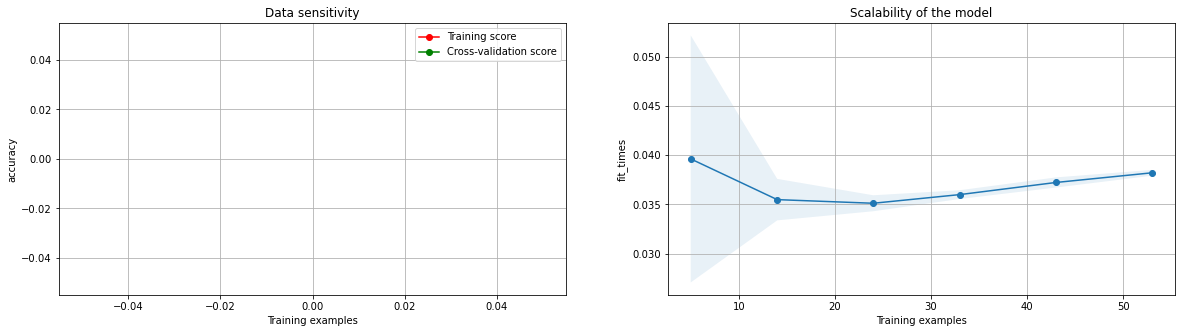

In [456]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

_, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
train_scores_mean + train_scores_std, alpha=0.1,
color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
test_scores_mean + test_scores_std, alpha=0.1,
color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
label="Cross-validation score")
axes[0].legend(loc="best")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("accuracy")
axes[0].set_title("Data sensitivity")
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

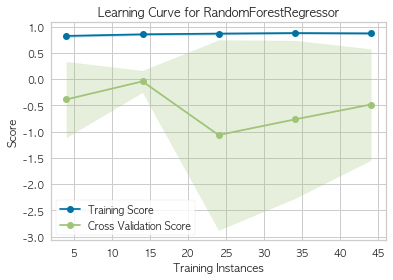

<AxesSubplot:title={'center':'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [1128]:
from sklearn.linear_model import RidgeCV

#from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import LearningCurve


# Instantiate the regression model and visualizer
model = tree_reg
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [769]:
acc_tree_reg = round(visualizer.score(X_test, y_test) * 100, 2)
acc_tree_reg

98.36

/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54693 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wooseobsim/miniforge3/lib/python3.9/site-package

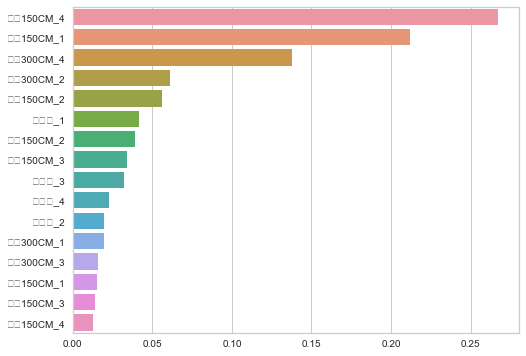

In [818]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
%matplotlib inline
 
tree_reg_values = tree_reg.feature_importances_
tree_reg_importances = pd.Series(tree_reg_values, index=X_train.columns)
ftr_top = tree_reg_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()


ValueError: x and y must have same first dimension, but have shapes (10,) and (8,)

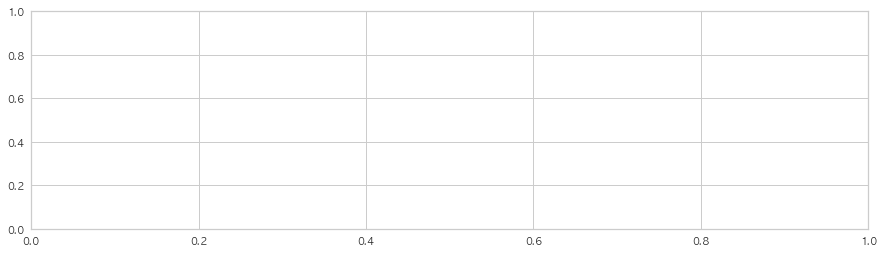

In [1188]:
# 한글 폰트 출력
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

grouped = X['기온150CM_1'].groupby(X['지역'])

plt.figure(figsize=(15,4))
plt.plot(np.arange(2011,2021,1), list(grouped.mean()))
#plt.plot(list(submission['예측값']), label = '예측값')
plt.legend()
plt.title("1분기 평균 기온")
plt.show()

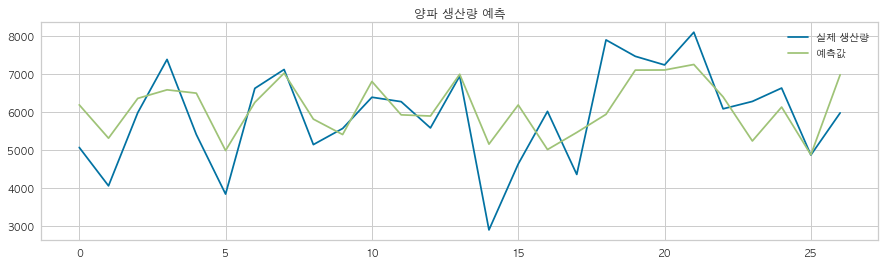

In [848]:
plt.figure(figsize=(15,4))
plt.plot(list(submission['실제 생산량']), label = '실제 생산량')
plt.plot(list(submission['예측값']), label = '예측값')
plt.legend()
plt.title("양파 생산량 예측")
plt.show()

In [1065]:
import joblib
joblib.dump(tree_reg, 'tree_reg_마늘.pkl')



['tree_reg_마늘.pkl']

In [1184]:
X

,기온150CM_1,풍향300CM_1,습도150CM_1,토양수분10CM_1,일사량_1,기온150CM_2,풍향300CM_2,습도150CM_2,일사량_2,기온150CM_3,풍향300CM_3,습도150CM_3,일사량_3,기온150CM_4,풍향300CM_4,습도150CM_4,일사량_4,지역
0,9.940000,251.336667,62.443333,29.100000,4.250000,18.440000,205.412267,68.156410,16.036667,24.503684,192.062105,79.224842,12.972316,8.719894,205.354787,68.321915,8.583298,1
1,1.111170,219.490319,61.909468,34.103936,10.048085,18.463511,203.973723,67.220426,17.747340,24.429684,194.097474,79.495263,13.601579,6.034737,210.007263,71.629474,8.953789,1
2,0.800000,217.688889,67.888889,38.766667,10.744444,17.615385,215.615385,71.934066,17.747253,25.576087,202.880435,83.130435,13.380435,7.565217,226.576087,75.152174,2.054348,1
3,3.255556,243.100000,67.400000,35.088889,11.550978,18.021978,254.373626,69.175824,9.274725,23.956522,182.718750,80.717391,13.250000,7.250000,214.228261,71.163043,10.500000,1
4,2.311111,265.188889,65.711111,35.288889,12.066667,17.813187,235.670330,68.758242,19.406593,24.163043,197.489130,77.271739,16.847826,8.826087,224.152174,77.195652,8.923913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,6.560440,176.692308,66.604396,24.835165,9.648352,18.021978,173.505495,82.000000,15.692308,25.673913,149.989130,83.467391,15.630435,13.195652,137.663043,75.847826,8.282609,9
86,6.577778,151.666667,65.322222,27.211111,11.044444,17.813187,164.296703,74.197802,18.098901,24.418182,142.890909,79.090909,14.309091,10.160000,157.920000,66.960000,6.660000,9
87,6.288889,160.088889,70.222222,28.844444,10.511111,18.219780,168.978022,79.010989,17.538462,26.173913,148.608696,79.184783,20.076087,12.032609,139.456522,70.489130,9.391304,9
88,6.954222,148.674667,68.101000,28.988556,10.789000,17.335824,159.425604,73.909890,19.235824,24.564186,131.763721,85.591395,14.348140,13.273370,118.267935,71.926196,9.549783,9


<AxesSubplot:>

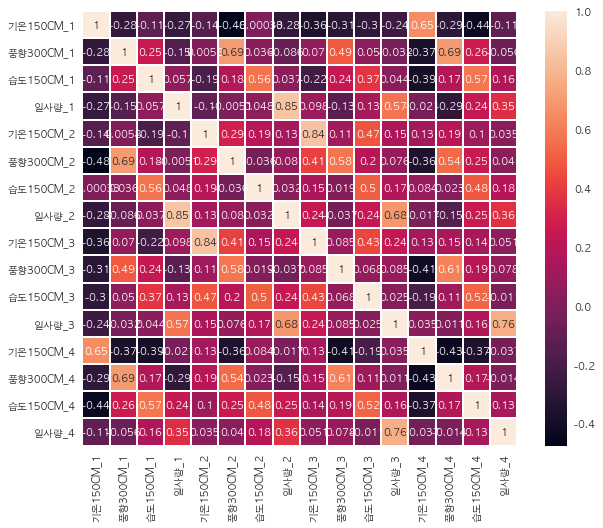

In [854]:
import seaborn as sns

plt.figure(figsize = (10,8))
sns.heatmap(X.corr()
            , linewidths = 0.1
            , square = True
            , annot = True
            )

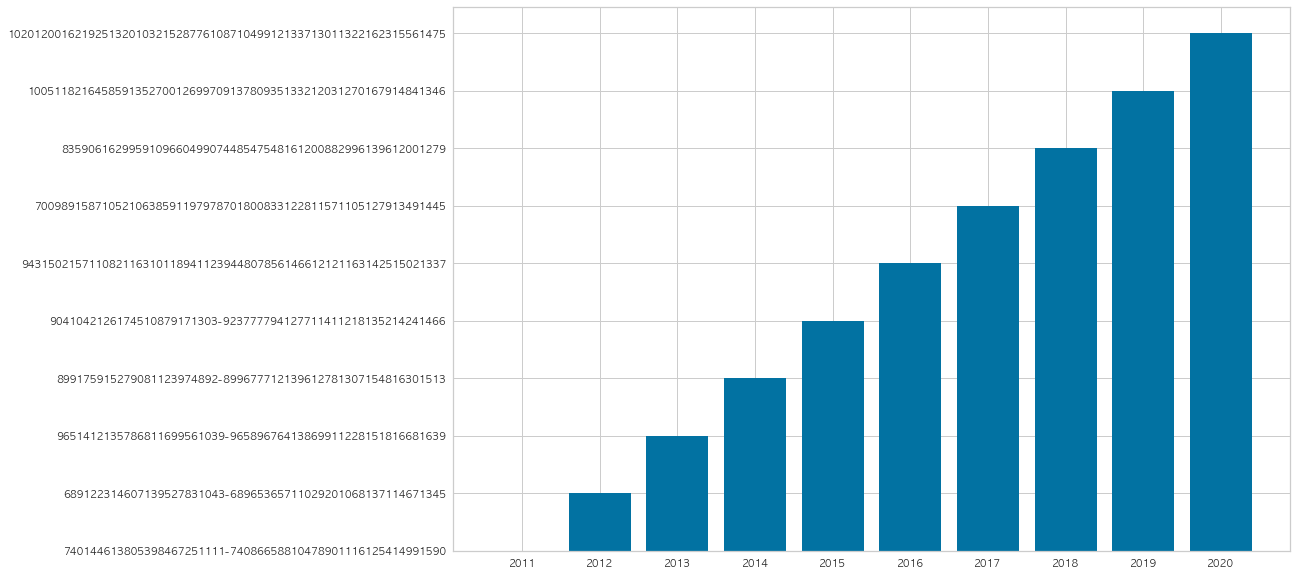

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [1176]:
plt.figure(figsize=(15,10))
plt.bar(list(ma_production.columns)[1:],list(ma_production.sum())[1:])
plt.show()
plt.figure(figsize=(15,10))
#plt.bar(ma_production.mean(), pa_production.columns)

In [1169]:
list(pa_production.columns)[1:]

['2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [1198]:
X.to_csv('data_analysis/mean_data.csv')

In [1199]:
X.columns

Index(['기온150CM_1', '풍향300CM_1', '습도150CM_1', '토양수분10CM_1', '일사량_1',
       '기온150CM_2', '풍향300CM_2', '습도150CM_2', '일사량_2', '기온150CM_3',
       '풍향300CM_3', '습도150CM_3', '일사량_3', '기온150CM_4', '풍향300CM_4',
       '습도150CM_4', '일사량_4', '지역'],
      dtype='object')

In [1205]:
tree_reg.predict([[0.7666666666666669,
 1.0666666666666667,
 60.23333333333334,
 25.433333333333334,
 357.0,
 17.666666666666668,
 1.3666666666666665,
 59.43333333333334,
 506.23333333333335,
 22.63380434782609,
 153.22782608695653,
 91.09119565217392,
 13.53728260869565,
 5.277717391304347,
 174.99271739130432,
 77.4716304347826,
 10.025978260869564]])

/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1605.25192857])

In [1257]:
import pickle
import joblib

model = joblib.load('tree_reg_pa.pkl')

In [1258]:
prod2022 = model.predict([[0.7666666666666669,
 1.0666666666666667,
 60.23333333333334,
 25.433333333333334,
 357.0,
 17.666666666666668,
 1.3666666666666665,
 59.43333333333334,
 506.23333333333335,
 22.63380434782609,
 153.22782608695653,
 91.09119565217392,
 13.53728260869565,
 5.277717391304347,
 174.99271739130432,
 77.4716304347826,
 10.025978260869564]])[0]

/Users/wooseobsim/miniforge3/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [1259]:
prod2021 = list(pa_production['2020'])
prod_2021 = sum(list(map(int,prod2020)))/len(prod2020)
prod2019 = list(pa_production['2019'])
prod_2019 = sum(list(map(int,prod2019)))/len(prod2019)

Text(0.5, 1.0, '단위 면적(a)당 마늘 생산량')

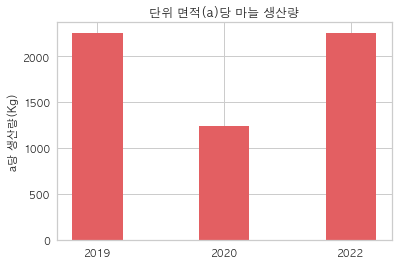

In [1260]:
x = np.arange(3)
years = [2019, 2020, 2022]
values = [prod_2019, prod_2021, int(prod2022)]

#plt.bar(x, values, color='y')
#plt.bar(x, values, color='dodgerblue')
#plt.bar(x, values, color='C2')
plt.bar(x, values, color='#e35f62', width=0.4, align='center')
plt.xticks(x, years)
plt.ylabel("a당 생산량(Kg)")
plt.title("단위 면적(a)당 마늘 생산량")